 <img src="./markdown/reco.jpg" alt="Recommendation system" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 80%;height:350px"> 

<h1 style="text-align:center;font-size:35px;">Recipe recommendation system</h1>
<br>

<h1 style="font-size:30px;color:#008abc;">Introduction</h1>

#### The goal of this project is to ultimately create a personalized recipe recommendation system that learns from the choice of its users. 
##### Data source and fields explanation:https://data.world/atlas-query/cookbook


##### Due to feasibility limitations, the recommender system will not be able to track users` preferences so that we will come up with a new goal.

## Healthy recommender system 
##### This system will keep track of the ingredients from each recipe, also will keep track of the important and needed intake of nutrients for a healthy nutrition.
<br>

### Import required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import random

### Load data

In [2]:
df_recipe_recommender = pd.read_csv('./exports/recipe_recommender.csv')
df_recipe_clean = pd.read_csv('./exports/recipe_clean.csv')
df_healthy_nutrients = pd.read_csv('./exports/nutrients_for_health.csv')

#### Add a total duration time for each recipe

In [3]:
df_recipe_clean['total_min'] = df_recipe_clean['prep_min'] + df_recipe_clean['cook_min'] + df_recipe_clean['stnd_min']
df_recipe_clean.head()

,recipe_id,title,servings,prep_min,cook_min,stnd_min,directions,total_min
0,214,Raspberry Chiffon Pie,10,20,8,305,"For crust, preheat oven to 375 degrees F.\nIn...",333
1,215,Apricot Yogurt Parfaits,4,5,2,65,"Drain canned apricots, pour 1/4 cup of the ju...",72
2,216,Fresh Apricot Bavarian,8,5,13,0,Drop apricots into boiling water to cover. R...,18
3,217,Fresh Peaches with Banana Cream Whip,4,10,0,0,"In a small bowl, beat egg white until foamy. ...",10
4,218,Canned Cherry Crisp,6,10,5,0,"Pour cherry pie filling into an 8-inch, round...",15


In [4]:
df_ml_recipe = df_recipe_clean.drop(['servings','directions','prep_min', 'cook_min', 'stnd_min'], axis=1)

In [5]:
df_ml_recipe['rating_outOf_5'] = 3.0
df_ml_recipe

,recipe_id,title,total_min,rating_outOf_5
0,214,Raspberry Chiffon Pie,333,3.0
1,215,Apricot Yogurt Parfaits,72,3.0
2,216,Fresh Apricot Bavarian,18,3.0
3,217,Fresh Peaches with Banana Cream Whip,10,3.0
4,218,Canned Cherry Crisp,15,3.0
...,...,...,...,...
873,1410,No-Bake Chocolate Cheesecake,150,3.0
874,1411,Mexican Cocoa Torte,222,3.0
875,1426,-Pancakes-,20,3.0
876,1427,-Waffles-,25,3.0


### Make healthy recipes

In [6]:
df_healthy_nutrients['healthy'] = False
df_healthy_nutrients.shape

(878, 8)

In [7]:
df_copy = df_healthy_nutrients.copy()
for index, row in df_healthy_nutrients.iterrows():
    if (row['protein'] >= 10 and row['protein'] <= 25) and (row['total_fat'] >= 0 and row['total_fat'] <=25) and (row['calories'] >= 100 and row['calories'] <= 500) and (row['carbo'] >= 5 and row['carbo'] <= 100) and (row['sodium']>= 0 and row['sodium']<=800):
        df_copy.loc[index, 'healthy'] = True

In [8]:
df_recipe_final = pd.merge(df_copy, df_ml_recipe, on='recipe_id', how='left')
df_recipe_final

,recipe_id,protein,carbo,total_fat,cholestrl,sodium,calories,healthy,title,total_min,rating_outOf_5
0,214,5.47,41.29,11.53,1.39,260.78,290.79,False,Raspberry Chiffon Pie,333,3.0
1,215,5.70,23.75,1.08,3.48,46.17,141.01,False,Apricot Yogurt Parfaits,72,3.0
2,216,4.90,26.88,1.10,3.46,41.79,137.06,False,Fresh Apricot Bavarian,18,3.0
3,217,1.77,18.17,0.21,0.00,14.01,81.70,False,Fresh Peaches with Banana Cream Whip,10,3.0
4,218,1.38,36.63,5.47,10.36,50.22,201.23,False,Canned Cherry Crisp,15,3.0
...,...,...,...,...,...,...,...,...,...,...,...
873,1427,6.57,30.14,13.74,60.38,173.88,270.50,False,-Waffles-,25,3.0
874,1428,9.13,29.91,16.88,144.36,458.80,308.10,False,-French Toast-,15,3.0
875,1429,1.35,3.13,0.26,0.00,15.34,20.31,False,-Mixed Green Salad-,0,3.0
876,1432,23.04,60.78,9.27,430.09,1075.80,418.73,False,Curried Chicken Livers Topped Spud,25,3.0


### Search for total-min outliers

<AxesSubplot:xlabel='total_min'>

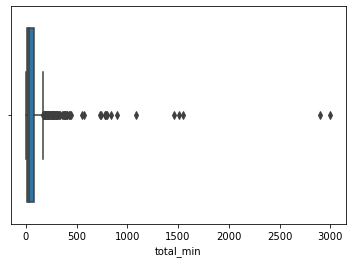

In [9]:
sns.boxplot(x=df_recipe_final['total_min'])

#### Let`s remove all recipes with less than 5 mins and more than 500 mins.

In [10]:
more_5 = df_recipe_final['total_min'] >= 5
less_200 = df_recipe_final['total_min'] < 500
df_result = df_recipe_final[more_5& less_200]
df_result.shape

(749, 11)

<AxesSubplot:xlabel='total_min'>

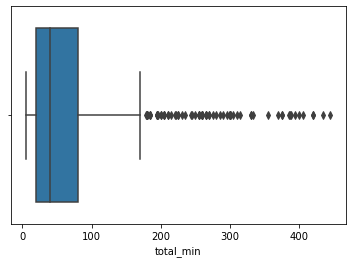

In [11]:
sns.boxplot(x=df_result['total_min'])

In [12]:
df_result.shape

(749, 11)

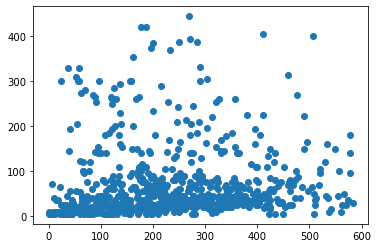

In [37]:
calories = df_result['calories'] < 600
df_ml = df_result[calories].copy()
df_ml
plt.scatter(df_ml['calories'], df_ml['total_min'])

We cannot differentiate clusters in this

In [14]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_ml[['calories', 'total_min']])
    sse.append(km.inertia_)

In [15]:
sse

[18312220.337023914,
 8820762.99136904,
 5969637.098404678,
 3870752.7634837045,
 3108841.570638717,
 2537618.463103065,
 2170435.5917672277,
 1854854.6027733372,
 1641084.9692440897]

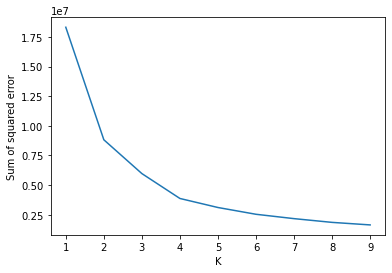

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

In [17]:
X_km = df_ml[['recipe_id','calories', 'total_min', 'rating_outOf_5', 'healthy']].copy()
km = KMeans(n_clusters=4)
km.fit(X_km[['calories', 'total_min']])
centers = pd.DataFrame(km.cluster_centers_, columns=X_km[['calories', 'total_min']].columns)
centers

,calories,total_min
0,180.872464,267.275362
1,239.471133,48.554687
2,420.123684,69.695906
3,86.907333,30.916667


In [18]:
X_km['cluster'] = km.labels_
X_km

,recipe_id,calories,total_min,rating_outOf_5,healthy,cluster
0,214,290.79,333,3.0,False,0
1,215,141.01,72,3.0,False,3
2,216,137.06,18,3.0,False,3
3,217,81.70,10,3.0,False,3
4,218,201.23,15,3.0,False,1
...,...,...,...,...,...,...
872,1426,200.63,20,3.0,False,1
873,1427,270.50,25,3.0,False,1
874,1428,308.10,15,3.0,False,1
876,1432,418.73,25,3.0,False,2


<AxesSubplot:xlabel='calories', ylabel='total_min'>

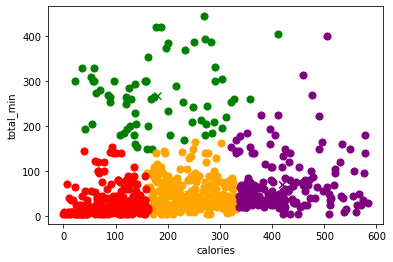

In [19]:
ax = X_km[X_km['cluster']==0].plot(kind='scatter', x='calories', y='total_min', s=50, c='green', sharex=False)
X_km[X_km['cluster']==1].plot(kind='scatter',x='calories',y='total_min',s=50, c='orange', sharex=False, ax = ax)
X_km[X_km['cluster']==2].plot(kind='scatter',x='calories',y='total_min',s=50, c='purple', sharex=False, ax = ax)
X_km[X_km['cluster']==3].plot(kind='scatter',x='calories',y='total_min',s=50, c='red', sharex=False, ax = ax)
centers.plot(kind = 'scatter', x='calories', y='total_min', c=['green','orange','purple', 'red'], s=50, marker='x', sharex=False, ax=ax)

1st approach the user chooses some recipes and we should recommend him more recipes from the same cluster.  This way we do not change the actual clusters, but we want to collect ratings for the given recipes.

1) Scale data that we already have

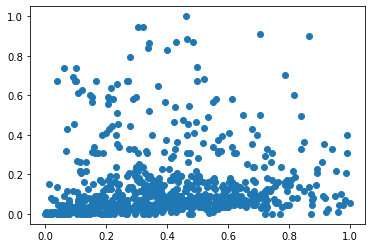

In [20]:
scaler = MinMaxScaler()
X_km[['calories', 'total_min']] = scaler.fit_transform(X_km[['calories', 'total_min']])
plt.scatter(X_km.calories, X_km.total_min)

In [21]:
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(X_km[['calories', 'total_min']])
X_km['cluster'] = y_predicted

In [22]:
km.cluster_centers_

array([[0.14784152, 0.05805959],
       [0.40820695, 0.1002106 ],
       [0.71913897, 0.13714827],
       [0.33176544, 0.60473752]])

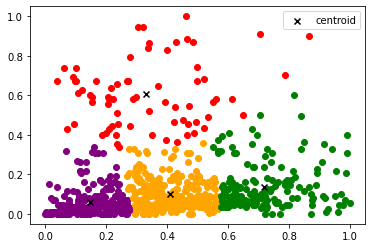

In [23]:
df1 = X_km[X_km.cluster==0]
df2 = X_km[X_km.cluster==1]
df3 = X_km[X_km.cluster==2]
df4 = X_km[X_km.cluster==3]
plt.scatter(df1.calories, df1.total_min, color='purple')
plt.scatter(df2.calories, df2.total_min, color='orange')
plt.scatter(df3.calories, df3.total_min, color='green')
plt.scatter(df4.calories, df4.total_min, color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='x',label='centroid')
plt.legend()

In [24]:
list_of_recipeId = X_km['recipe_id'].to_list()
#from within this list let`s randomly choose 10 recipes
#then calculate what is the most popular cluster from those 10 recipes
#and recommend from that one

#User chooses 1 recipe
user_fav_recipe = X_km.sample()
print('fav recipe', user_fav_recipe)
recipe_cluster = user_fav_recipe.iloc[0]['cluster']
print('cluster ', recipe_cluster)

#recommend 10 recipes from that cluster
list_recommendation = X_km[X_km['cluster'] == recipe_cluster]

#recommend 80% of healthy recipes if exist
list_healthy_recommendation = list_recommendation[list_recommendation['healthy'] == True]
list_nonHealthy_recommendation = list_recommendation[list_recommendation['healthy'] == False]
healthy_length = len(list_healthy_recommendation)
nonHealthy_length = -1

#----------------------
#when randomly picking 10 recipes
if healthy_length > 7:
    random_healthy_recipes = list_healthy_recommendation.sample(8)
    nonHealthy_length = 2
else:
    random_healthy_recipes = list_healthy_recommendation.sample(healthy_length)
    nonHealthy_length = 10 - healthy_length

random_nonHealthy_recipes = list_nonHealthy_recommendation.sample(nonHealthy_length)

frames = [random_healthy_recipes, random_nonHealthy_recipes]
df_recommend = pd.concat(frames)
list_Ids = df_recommend['recipe_id'].to_list()


#Recommend recipes from the df_ml table
column_nam = df_ml.columns
full_recipe_recomm = pd.DataFrame(columns = column_nam)
for i in list_Ids:
    full_recipe_recomm = full_recipe_recomm.append(df_ml[df_ml['recipe_id'] == i], ignore_index=False)
full_recipe_recomm

fav recipe      recipe_id  calories  total_min  rating_outOf_5  healthy  cluster
206        528  0.610795   0.079545             3.0     True        2
cluster  2


,recipe_id,protein,carbo,total_fat,cholestrl,sodium,calories,healthy,title,total_min,rating_outOf_5
230,552,22.79,41.87,11.94,71.70,542.16,366.11,True,Beef Jambalaya,50,3.0
304,627,10.17,47.82,13.01,55.29,29.30,349.07,True,Fettuccine with Walnuts and California Avocado,21,3.0
664,1062,18.29,42.20,10.49,36.62,256.12,336.36,True,Hawaiian Turkey Salad,20,3.0
651,1048,24.35,39.05,7.70,51.50,534.09,331.32,True,Ginger Chicken Stir-Fry,145,3.0
246,569,16.15,32.73,15.00,33.65,404.88,330.55,True,Strawberry-Pork Salad,140,3.0
251,574,22.51,49.67,12.48,43.12,456.16,401.03,True,Five-Spice Fried Rice,25,3.0
325,648,14.15,52.01,11.93,9.84,543.94,372.03,True,Warm Tomato-Pepper Pasta,27,3.0
146,466,14.88,55.91,7.95,28.57,516.16,354.71,True,Greek Stuffed Potato,85,3.0
659,1057,32.14,47.27,13.63,86.18,1018.93,440.35,False,Jambalaya,68,3.0
864,1408,5.22,75.42,27.11,127.89,355.78,566.50,False,Fudge Brownie Pie,50,3.0


In [38]:
#Rate these first 10 recommendations
uInput = ""
count = 0
recipes = full_recipe_recomm['title'].to_list()
recipes1 = full_recipe_recomm[full_recipe_recomm['title'] == recipes[0]]
recipes1
while uInput != 'x' and count < len(recipes):
    currentRecipe = full_recipe_recomm[full_recipe_recomm['title'] == recipes[count]]
    print("Recipe: " + recipes[count])
    print("Rating: ")
    uInput = input()
    if uInput != 'x':
        if float(uInput) > 5 or float(uInput) < 0:
            print("Rating needs to be between 0-5. Try again")
            uInput = input()
    if uInput != 'x':
        recipe_id = currentRecipe['recipe_id'].iloc[0]
        df_ml.loc[currentRecipe.index, df_ml.columns.get_loc("rating_outOf_5")] = float(uInput)
    count += 1

Recipe: Beef Jambalaya
Rating: 


 5


Recipe: Fettuccine with Walnuts and California Avocado
Rating: 


 3.5


Recipe: Hawaiian Turkey Salad
Rating: 


 5


Recipe: Ginger Chicken Stir-Fry
Rating: 


 4


Recipe: Strawberry-Pork Salad
Rating: 


 4.5


Recipe: Five-Spice Fried Rice
Rating: 


 5


Recipe: Warm Tomato-Pepper Pasta
Rating: 


 3


Recipe: Greek Stuffed Potato
Rating: 


 1


Recipe: Jambalaya
Rating: 


 2.5


Recipe: Fudge Brownie Pie
Rating: 


 2.4


In [26]:
#give ratings for more recipes from the data set
def give50RandomRatings(df):
    df_new = df[df['rating_outOf_5'] == 3.0]
    df_sample = df_new.sample(50)
    
    

In [39]:
def recommendRecipe(df):          
    
    #apply scaling
    scaler = MinMaxScaler()
    X_second_km = df.copy()
    X_second_km[['calories', 'total_min', 'rating_outOf_5']] = scaler.fit_transform(df[['calories', 'total_min', 'rating_outOf_5']])
    km = KMeans(n_clusters = 3)
    y_predicted = km.fit_predict(X_second_ml[['calories', 'total_min', 'rating_outOf_5']])
    X_second_km['cluster'] = y_predicted
    df = df[df['rating_outOf_5'] > 2.5]
    if len(df[df['healthy'] == True]) > 2:
        df = df[df['healthy'] == True]
    recipe = df.sample()
    
    return recipe

In [41]:
uInput = ""
count = 0
recipes = full_recipe_recomm['title'].to_list()
recipes1 = full_recipe_recomm[full_recipe_recomm['title'] == recipes[0]]
recipes1
while uInput != 'x':
    currentRecipe = recommendRecipe(df_ml.copy())
    #currentRecipe
    print("Recipe: " + currentRecipe['title'].iloc[0])
    print("Rating: ")
    uInput = input()
    if uInput != 'x':
        df_ml.at[currentRecipe.index, 'rating_outOf_5'] = float(uInput)

Recipe: Moroccan Egg Salad
Rating: 


 2.5


Recipe: Chicken Chutney Salad
Rating: 


 5


Recipe: Summer Seafood Salad
Rating: 


 5


Recipe: Mushroom Baked Sole
Rating: 


 4


Recipe: Bake Mine Vegetarian
Rating: 


 5


Recipe: -Vanilla Milk Shake-
Rating: 


 1.5


Recipe: Brown Rice Chicken Bake
Rating: 


 3


Recipe: -Kidney Beans-
Rating: 


 1


Recipe: Tandoori Pork Saute
Rating: 


 4


Recipe: Five-Spice Fried Rice
Rating: 


 5


Recipe: Curried Bean and Rice Salad
Rating: 


 5


Recipe: Top Hat Pizza
Rating: 


 2


Recipe: Mussels with Linguine
Rating: 


 2


Recipe: Chicken Chutney Salad
Rating: 


 5


Recipe: Smoked Chicken Pizza
Rating: 


 1


Recipe: Gruyere Sauced Potatoes
Rating: 


 2


Recipe: Turkey Pockets Al Greco
Rating: 


 3


Recipe: Three Cheese Potatoes
Rating: 


 x
